<a href="https://colab.research.google.com/github/hieplh/PPR501/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cài đặt những thư viện cần thiết

In [ ]:
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
set_trains = pd.read_csv('https://raw.githubusercontent.com/hieplh/PPR501/main/assignment/train.csv')

# Tiền xử lý dữ liệu (xử lý các trường hợp thiếu dữ liệu, chuẩn hóa ngày tháng, đơn vị,...)

In [ ]:
print(set_trains.isnull().sum())

default_postal_code = 43615.0
set_trains['Postal Code'] = set_trains['Postal Code'].fillna(default_postal_code)

print()
print(set_trains.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [ ]:
print(set_trains['Order Date'], set_trains['Ship Date'])

set_trains['Order Date'] = pd.to_datetime(set_trains['Order Date'], format='%d/%m/%Y')
set_trains['Ship Date'] = pd.to_datetime(set_trains['Ship Date'], format='%d/%m/%Y')

print()

print(set_trains['Order Date'], set_trains['Ship Date'])

0       08/11/2017
1       08/11/2017
2       12/06/2017
3       11/10/2016
4       11/10/2016
           ...    
9795    21/05/2017
9796    12/01/2016
9797    12/01/2016
9798    12/01/2016
9799    12/01/2016
Name: Order Date, Length: 9800, dtype: object 0       11/11/2017
1       11/11/2017
2       16/06/2017
3       18/10/2016
4       18/10/2016
           ...    
9795    28/05/2017
9796    17/01/2016
9797    17/01/2016
9798    17/01/2016
9799    17/01/2016
Name: Ship Date, Length: 9800, dtype: object

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9800, dtype: datetime64[ns] 0      2017-11-11
1      2017-11-11
2      2017-06-16
3      2016-10-18
4      2016-10-18
          ...    
9795   2017-05-28
9796   2016-01-17
9797   2016-01-17
9798   2016-01-17
9799   2016-01-17
Name: Ship Date, Length: 9800, dtype: da

# Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



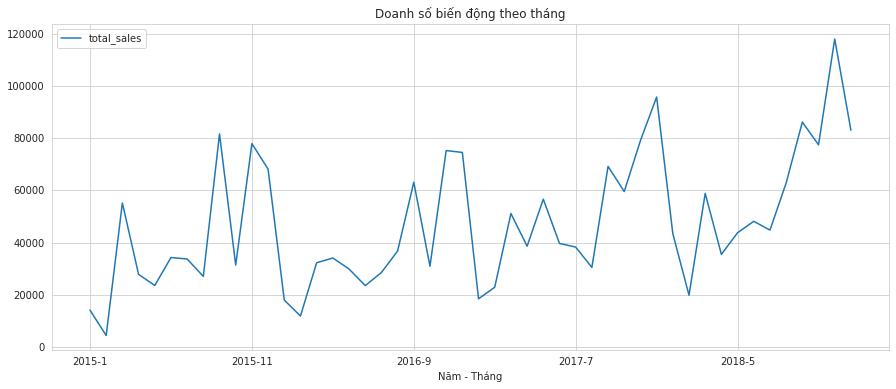

In [ ]:
X = set_trains
X['Year'] = X['Order Date'].dt.year
X['Month'] = X['Order Date'].dt.month

X = X.groupby(['Year', 'Month'])['Sales'].sum().reset_index(name='total_sales')

X['year_month'] = 0
for i in range(len(X)):
  X['year_month'][i] = str(X['Year'][i]) + '-' + str(X['Month'][i])

X = X.drop(['Year', 'Month'], axis = 1)

# Set the Date as Index
X.index = X['year_month']

X.plot(figsize=(15, 6))
plt.title("Doanh số biến động theo tháng")
plt.xlabel('Năm - Tháng')

plt.show()

In [ ]:
X = set_trains
X['Month'] = X['Order Date'].dt.month
X['Year'] = X['Order Date'].dt.year

X = X.groupby(['Year', 'Month'])['Sales'].sum().reset_index(name='total_sales')

X = X.iloc[len(X) - 3: len(X)]
print('Doanh thu trung bình trong 3 tháng gần nhất:', X['total_sales'].mean())

Doanh thu trung bình trong 3 tháng gần nhất: 92805.55833333333


# Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất

In [ ]:
X = set_trains
X['Month'] = X['Order Date'].dt.month
X = X.groupby(['Year', 'Month'])['Sales'].sum().reset_index(name='total_sales')

Y = pd.DataFrame()
index = 0
quarter = 0
while index < len(X):
  quarter = (quarter + 1) if quarter < 4 else 1
  total_sales = 0.0
  for i in range(3):
    total_sales += X['total_sales'][index]
    index += 1
  Y = Y.append(pd.DataFrame({
      'quarter': ['Q' + str(quarter) + ' ' + str(X['Year'][index - 1])],
      'total_sales': total_sales
  }), ignore_index = True)

# Figure Size
fig, ax = plt.subplots(figsize = (16, 9))
 
# Horizontal Bar Plot
ax.barh(Y['quarter'], Y['total_sales'])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Doanh số bán hàng theo quý',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [ ]:
print('Quý có tổng doanh số cao nhất', Y.max())

Quý có tổng doanh số cao nhất quarter            4_2018
total_sales    278416.675
dtype: object


# Tính thời gian giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này

In [ ]:
X = set_trains
X['time_delivery'] = X['Ship Date'] - X['Order Date']
X = X.groupby(['Year', 'Month'])['time_delivery'].mean().reset_index()

print('Thời gian giao hàng trung bình')
X

Thời gian giao hàng trung bình


,Year,Month,time_delivery
0,2015,1,4 days 04:40:31.168831168
1,2015,2,4 days 04:10:26.086956521
2,2015,3,3 days 23:03:53.766233766
3,2015,4,4 days 00:22:09.230769230
4,2015,5,3 days 19:14:22.809917355
5,2015,6,4 days 05:07:47.175572519
6,2015,7,3 days 20:16:54.084507042
7,2015,8,4 days 02:08:13.150684931
8,2015,9,4 days 01:20:53.932584269
9,2015,10,3 days 08:36:13.584905660


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



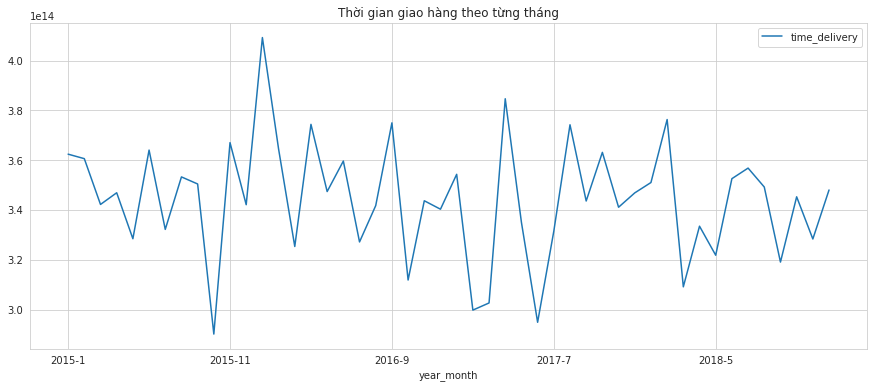

In [ ]:
X['year_month'] = 0
for i in range(len(X)):
  X['year_month'][i] = str(X['Year'][i]) + '-' + str(X['Month'][i])

X = X.drop(['Year', 'Month'], axis = 1)

# Set the Date as Index
X.index = X['year_month']

X.plot(figsize=(15, 6))
plt.title("Thời gian giao hàng theo từng tháng")
plt.show()

# Vẽ biểu đồ thể hiện sức mua theo từng thành phố. Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất

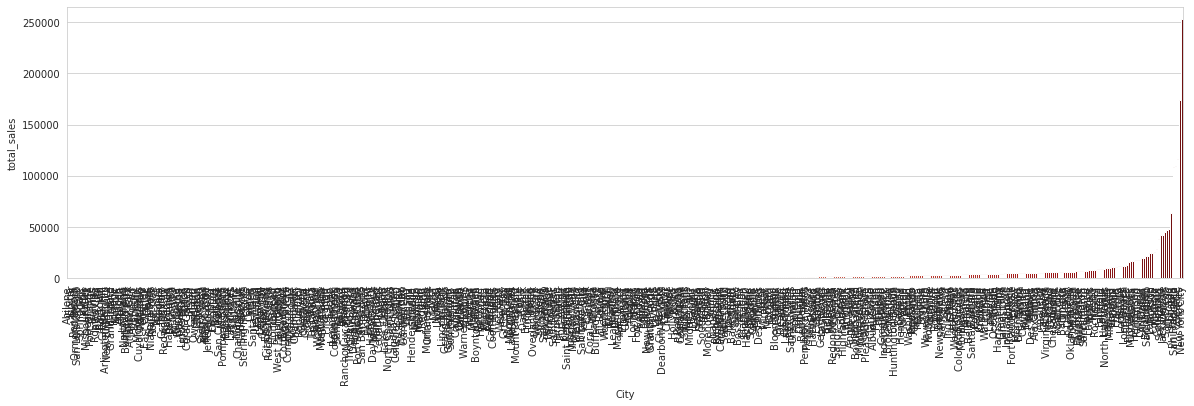

In [ ]:
X = set_trains
X = X.groupby(['City'])['Sales'].sum().reset_index(name='total_sales').sort_values('total_sales', ascending=True)

sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(20, 5))
sns.barplot(x = 'City', y = 'total_sales', data = X, 
            order = X.sort_values(['total_sales'], ascending=True).City,
            palette='OrRd')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print('3 thành phố có doanh số thấp nhất')
print(X.head(3))

print()

print('3 thành phố có doanh số cao nhất')
print(X.tail(3))

3 thành phố có doanh số thấp nhất
        City  total_sales
1    Abilene        1.392
140   Elyria        1.824
221  Jupiter        2.064

3 thành phố có doanh số cao nhất
              City  total_sales
450        Seattle   116106.322
265    Los Angeles   173420.181
327  New York City   252462.547


# Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state) và cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua

In [ ]:
X = set_trains
X = X.groupby(['State'])['Sales'].sum().reset_index(name='total_sales').sort_values('total_sales')

fig = px.pie(X, values=X['total_sales'], names=X['State'], title='Tỉ trọng doanh số theo bang',
             width = 700, height = 500)
fig.update_traces(textposition='inside', textinfo='percent + label')
fig.show()

In [ ]:
X = set_trains
X = X.groupby(['State'])['Sales'].mean().reset_index().sort_values(by = 'Sales')

print('Doanh số trung bình của 5 bang dẫn đầu về sức mua')
X.tail(5)

Doanh số trung bình của 5 bang dẫn đầu về sức mua


,State,Sales
24,Montana,372.623467
37,Rhode Island,409.545927
26,Nevada,428.951333
43,Vermont,811.760909
48,Wyoming,1603.136000


# Cho biết các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..)

In [ ]:
X = set_trains
X = X.groupby(['Region', 'State'])['Sales'].sum().reset_index().sort_values(by = ['Region', 'Sales'], ascending = False)

print('Doanh số dẫn đầu của các bang theo từng vùng (east, west, south, central, ...)')
for region in X['Region'].unique():
  print(X[X['Region'] == region].head(1))

Doanh số dẫn đầu của các bang theo từng vùng (east, west, south, central, ...)
   Region       State        Sales
39   West  California  446306.4635
   Region    State      Sales
29  South  Florida  88436.532
   Region     State       Sales
21   East  New York  306361.147
     Region  State        Sales
11  Central  Texas  168572.5322


# Cho biết top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất

In [ ]:
X = set_trains
X = X.groupby(['Product ID', 'Product Name'])['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False)

print('Top 3 sản phẩm có doanh thu cao nhất')
X.head(3)

Top 3 sản phẩm có doanh thu cao nhất


,Product ID,Product Name,Sales
1639,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,61599.824
787,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
1668,TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferenci...,22638.480


In [ ]:
X = set_trains
X = X.groupby(['Product ID', 'Product Name'])['Sales'].count().reset_index().sort_values('Sales', ascending = False)

print('Top 3 sản phẩm có số lượng đơn vị bán ra cao nhất')
X.head(3)

Top 3 sản phẩm có số lượng đơn vị bán ra cao nhất


,Product ID,Product Name,Sales
95,FUR-CH-10002647,"Situations Contoured Folding Chairs, 4/Set",15
1590,TEC-AC-10003628,Logitech 910-002974 M325 Wireless Mouse for We...,15
704,OFF-BI-10001524,GBC Premium Transparent Covers with Diagonal L...,14


# Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category

In [ ]:
X = set_trains
X = X.groupby(['Category'])['Sales'].sum().reset_index(name='total_sales').sort_values('total_sales')

fig = px.pie(X, values = X['total_sales'], names = X['Category'], title = 'Tỉ trọng doanh số của từng category',
             width = 700, height = 500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()